In [3]:
import numpy as np
from scipy.optimize import fsolve
from numpy import radians, sin, cos
from matplotlib import pyplot as plt

%matplotlib inline

In [4]:
#known values
L1 = 9
L2 = 2.2
L3 = 4
L4 = 6
L5 = 1
L6 = 6
L7 = 10
L8 = 1
L9 = 9
L10 = 1
L11 = 6
Lx = 6.814
theta1 = radians(-90)
theta2 = radians(-105.8)
thetaA = radians(10)
thetaB = radians(2)
thetaC = radians(2)
thetaD = radians(2)

sample_guess = [
    radians(-114.7), #thetaX
    radians(-44.6), #theta3
    radians(-34.6), #theta4
    radians(-36.6), #theta5
    radians(-23.8), #theta6
    radians(-149.9), #theta7
    radians(-148.1), #theta8
    radians(-150.1), #theta9
    radians(-36.6), #theta10
    radians(-34.6), #theta11
]

In [5]:
def solveLegPos(guess, doPlot=False):

    def func(angles):

        [thetaX, theta3, theta4, theta5, theta6, theta7, theta8, theta9, theta10, theta11] = angles

        return [
            Lx*cos(thetaX) + L3*cos(theta3) - L1*cos(theta1),
            Lx*sin(thetaX) + L3*sin(theta3) - L1*sin(theta1),

            L4*cos(theta4) + L5*cos(theta5) - L6*cos(theta6) - L2*cos(theta2) + L8*cos(theta8),
            L4*sin(theta4) + L5*sin(theta5) - L6*sin(theta6) - L2*sin(theta2) + L8*sin(theta8),

            L5*cos(theta5) + L8*cos(theta8) + L9*cos(theta9) - L7*cos(theta7) - L10*cos(theta10),
            L5*sin(theta5) + L8*sin(theta8) + L9*sin(theta9) - L7*sin(theta7) - L10*sin(theta10),
            
            theta4 - theta3 - thetaA,
            theta5 - theta4 + thetaB,
            theta9 - theta8 + thetaC,
            theta11 - theta10 - thetaD
        ]

    root = fsolve(func, guess)

    [thetaX, theta3, theta4, theta5, theta6, theta7, theta8, theta9, theta10, theta11] = root

    if doPlot:
        print("error:",np.linalg.norm(func(root)))

        origin = np.zeros(2)
        vecX = np.array([Lx*cos(thetaX), Lx*sin(thetaX)])
        vec1 = np.array([L1*cos(theta1), L1*sin(theta1)])
        vec2 = np.array([L2*cos(theta2), L2*sin(theta2)])
        vec3 = np.array([L3*cos(theta3), L3*sin(theta3)])
        vec4 = np.array([L4*cos(theta4), L4*sin(theta4)])
        vec5 = np.array([L5*cos(theta5), L5*sin(theta5)])
        vec6 = np.array([L6*cos(theta6), L6*sin(theta6)])
        vec7 = np.array([L7*cos(theta7), L7*sin(theta7)])
        vec8 = np.array([L8*cos(theta8), L8*sin(theta8)])
        vec9 = np.array([L9*cos(theta9), L9*sin(theta9)])
        vec10 = np.array([L10*cos(theta10), L10*sin(theta10)])
        vec11 = np.array([L11*cos(theta11), L11*sin(theta11)])

        #[x0, y0, x1, y1]
        linkX = np.array([origin, vecX])
        link1 = np.array([origin, vec1])
        link2 = np.array([link1[1], link1[1] + vec2])
        link3 = np.array([linkX[1], linkX[1] + vec3])
        link4 = np.array([link1[1], link1[1] + vec4])
        link5 = np.array([link4[1], link4[1] + vec5])
        link6 = np.array([link2[1], link2[1] + vec6])
        link7 = np.array([link4[1], link4[1] + vec7])
        link8 = np.array([link5[1], link5[1] + vec8])
        link9 = np.array([link8[1], link8[1] + vec9])
        link10 = np.array([link7[1], link7[1] + vec10])
        link11 = np.array([link10[1], link10[1] + vec11])

        links = np.array([linkX, link1, link2, link3, link4, link5,
                        link6, link7, link8, link9, link10, link11])

        fig, ax = plt.subplots(figsize=(4, 4))
        ax.axis([-16, 16, -30, 2])
        plt.quiver(links[:, 0, 0], links[:, 0, 1], links[:, 1, 0]-links[:, 0, 0], links[:, 1, 1] - links[:, 0, 1],
                angles='xy', scale_units='xy', scale=1, width=0.005, headwidth=2)

    #return position of foot
    vec1 = np.array([L1*cos(theta1), L1*sin(theta1)])
    vec4 = np.array([L4*cos(theta4), L4*sin(theta4)])
    vec7 = np.array([L7*cos(theta7), L7*sin(theta7)])
    vec10 = np.array([L10*cos(theta10), L10*sin(theta10)])
    vec11 = np.array([L11*cos(theta11), L11*sin(theta11)])

    footpos = vec1 + vec4 + vec7 + vec10 + vec11

    return footpos, root

In [51]:
def plotLinks(color, alpha):
    
    footpos, root = solveLegPos(sample_guess, doPlot=False)

    [thetaX, theta3, theta4, theta5, theta6, theta7, theta8, theta9, theta10, theta11] = root

    origin = np.zeros(2)
    vecX = np.array([Lx*cos(thetaX), Lx*sin(thetaX)])
    vec1 = np.array([L1*cos(theta1), L1*sin(theta1)])
    vec2 = np.array([L2*cos(theta2), L2*sin(theta2)])
    vec3 = np.array([L3*cos(theta3), L3*sin(theta3)])
    vec4 = np.array([L4*cos(theta4), L4*sin(theta4)])
    vec5 = np.array([L5*cos(theta5), L5*sin(theta5)])
    vec6 = np.array([L6*cos(theta6), L6*sin(theta6)])
    vec7 = np.array([L7*cos(theta7), L7*sin(theta7)])
    vec8 = np.array([L8*cos(theta8), L8*sin(theta8)])
    vec9 = np.array([L9*cos(theta9), L9*sin(theta9)])
    vec10 = np.array([L10*cos(theta10), L10*sin(theta10)])
    vec11 = np.array([L11*cos(theta11), L11*sin(theta11)])

    # [x0, y0, x1, y1]
    linkX = np.array([origin, vecX])
    link1 = np.array([origin, vec1])
    link2 = np.array([link1[1], link1[1] + vec2])
    link3 = np.array([linkX[1], linkX[1] + vec3])
    link4 = np.array([link1[1], link1[1] + vec4])
    link5 = np.array([link4[1], link4[1] + vec5])
    link6 = np.array([link2[1], link2[1] + vec6])
    link7 = np.array([link4[1], link4[1] + vec7])
    link8 = np.array([link5[1], link5[1] + vec8])
    link9 = np.array([link8[1], link8[1] + vec9])
    link10 = np.array([link7[1], link7[1] + vec10])
    link11 = np.array([link10[1], link10[1] + vec11])

    links = np.array([linkX, link1, link2, link3, link4, link5,
                    link6, link7, link8, link9, link10, link11])

    plt.quiver(links[:, 0, 0], links[:, 0, 1], links[:, 1, 0]-links[:, 0, 0], links[:, 1, 1] - links[:, 0, 1],
            angles='xy', scale_units='xy', scale=1, width=0.005, headwidth=2, alpha=alpha, color=color)

    return links


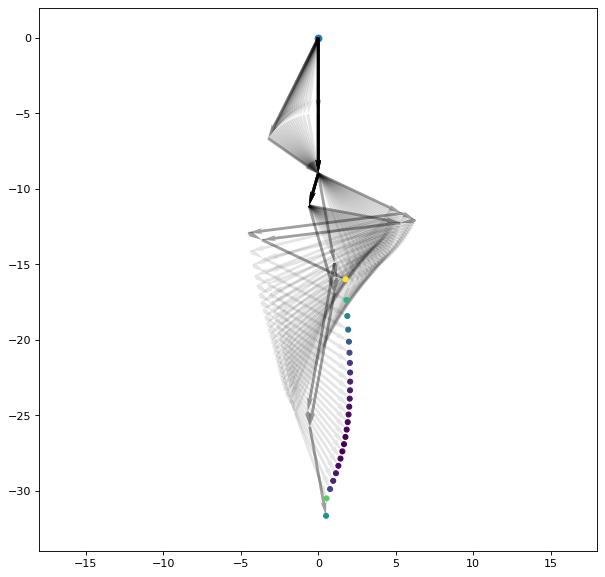

In [63]:
plt.figure(figsize=(9, 9), dpi=80)

plt.xlim(-18, 18)
plt.ylim(-34, 2)

plt.scatter(0, 0)

min_Lx = 5.0
max_Lx = 7.4

Lx = min_Lx
plotLinks('k', 0.3)
Lx = max_Lx
plotLinks('k', 0.3)


foot_xs = []
foot_ys = []

for testcase in np.arange(min_Lx, max_Lx, step=0.1):
    Lx = testcase
    footpos, root = solveLegPos(sample_guess, doPlot=False)

    plotLinks('k', 0.1)


    foot_xs.append(footpos[0])
    foot_ys.append(footpos[1])


foot_vs = [0.9395923872313183]
for i in range(1, len(foot_xs)):
    foot_vs.append(np.linalg.norm([foot_xs[i] - foot_xs[i-1], foot_ys[i] - foot_ys[i-1]]))

# print(foot_vs)

plt.scatter(foot_xs, foot_ys, c=foot_vs, s=20)





